In [63]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [42]:
dataset = pd.read_csv('./data/주차예측(한맥+다래).csv')
dataset['일시'] = pd.to_datetime(dataset['일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [43]:
dataset

,일시,주차장,입차대수,출차대수,입출차 차이,입출차 누계,연,월,일,시각,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,2020-10-01 00:00:00,"주차1동, 주차2동",0.0,0.0,0.0,5.0,2020,10,1,0,17.3,0.0,0.2,92.0,0.0
1,2020-10-01 01:00:00,"주차1동, 주차2동",0.0,0.0,0.0,5.0,2020,10,1,1,16.8,0.0,0.5,94.0,0.0
2,2020-10-01 02:00:00,"주차1동, 주차2동",0.0,0.0,0.0,5.0,2020,10,1,2,16.9,0.0,1.1,93.0,0.0
3,2020-10-01 03:00:00,"주차1동, 주차2동",0.0,0.0,0.0,5.0,2020,10,1,3,16.8,0.0,0.4,94.0,0.0
4,2020-10-01 04:00:00,"주차1동, 주차2동",1.0,0.0,1.0,6.0,2020,10,1,4,16.1,0.0,0.1,95.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22579,2022-10-01 19:00:00,"주차1동, 주차2동",4.0,11.0,-7.0,166.0,2022,10,1,19,21.1,0.0,0.1,54.0,0.0
22580,2022-10-01 20:00:00,"주차1동, 주차2동",1.0,6.0,-5.0,161.0,2022,10,1,20,19.6,0.0,0.6,63.0,0.0
22581,2022-10-01 21:00:00,"주차1동, 주차2동",1.0,3.0,-2.0,159.0,2022,10,1,21,18.8,0.0,0.7,73.0,0.0
22582,2022-10-01 22:00:00,"주차1동, 주차2동",2.0,1.0,1.0,160.0,2022,10,1,22,18.1,0.0,0.8,75.0,0.0


# 데이터 전처리

In [44]:
# 대체 휴일은 따로 지정해 줘야함
import holidays
kr_holidays = holidays.KR()

In [45]:
def holiday_check(x):
    if x in kr_holidays:
        return 1
    else :
        return 0

In [46]:
dataset['공휴일']= dataset['일시']
dataset['공휴일'] = dataset['공휴일'].apply(holiday_check)

In [47]:
hanmaek = dataset[dataset['주차장']=='주차1동, 주차2동']

In [48]:
hanmaek['요일'] = hanmaek['일시'].dt.weekday

/var/folders/nd/cl2nzwh13zx7jdly2t5m95340000gn/T/ipykernel_17631/3408295435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hanmaek['요일'] = hanmaek['일시'].dt.weekday


In [133]:
hanmaek_dataset = hanmaek[['일시','입출차 누계','시각','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)','요일','공휴일']]
hanmaek_dataset = hanmaek_dataset.set_index('일시')
CATEGORICAL_COLUMN = ['요일']

In [134]:
hanmaek_dataset['Trend'] = range(2020,2020+len(hanmaek_dataset))
hanmaek_dataset

,입출차 누계,시각,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),요일,공휴일,Trend
일시,,,,,,,,,,
2020-10-01 00:00:00,5.0,0,17.3,0.0,0.2,92.0,0.0,3,1,2020
2020-10-01 01:00:00,5.0,1,16.8,0.0,0.5,94.0,0.0,3,1,2021
2020-10-01 02:00:00,5.0,2,16.9,0.0,1.1,93.0,0.0,3,1,2022
2020-10-01 03:00:00,5.0,3,16.8,0.0,0.4,94.0,0.0,3,1,2023
2020-10-01 04:00:00,6.0,4,16.1,0.0,0.1,95.0,0.0,3,1,2024
...,...,...,...,...,...,...,...,...,...,...
2022-10-01 19:00:00,166.0,19,21.1,0.0,0.1,54.0,0.0,5,0,19559
2022-10-01 20:00:00,161.0,20,19.6,0.0,0.6,63.0,0.0,5,0,19560
2022-10-01 21:00:00,159.0,21,18.8,0.0,0.7,73.0,0.0,5,0,19561


# LGBM
##### 생각해야 할 것
- 트렌드 범위 어떻게? Ex) 1주가 지나면 0부터 시작?
- 시계열 데이터 전환?
- input data 고려

In [135]:
from datetime import datetime

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

train_hanmeak = hanmaek_dataset[hanmaek_dataset.index < datetime(2022, 10, 1)]
train_x = train_hanmeak.iloc[:, 1:]
train_y = train_hanmeak.iloc[:, 0]

test_hanmeak = hanmaek_dataset[hanmaek_dataset.index > datetime(2022, 10, 1)]
test_x = test_hanmeak.iloc[:, 1:]
test_y = test_hanmeak.iloc[:, 0]

In [142]:
train_x

,시각,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),요일,공휴일,Trend
일시,,,,,,,,,
2020-10-01 00:00:00,0,17.3,0.0,0.2,92.0,0.0,3,1,2020
2020-10-01 01:00:00,1,16.8,0.0,0.5,94.0,0.0,3,1,2021
2020-10-01 02:00:00,2,16.9,0.0,1.1,93.0,0.0,3,1,2022
2020-10-01 03:00:00,3,16.8,0.0,0.4,94.0,0.0,3,1,2023
2020-10-01 04:00:00,4,16.1,0.0,0.1,95.0,0.0,3,1,2024
...,...,...,...,...,...,...,...,...,...
2022-09-30 19:00:00,19,20.6,0.0,0.1,50.0,0.0,4,0,19535
2022-09-30 20:00:00,20,18.7,0.0,0.9,63.0,0.0,4,0,19536
2022-09-30 21:00:00,21,17.8,0.0,0.4,66.0,0.0,4,0,19537


In [143]:
params = {'learning_rate': 0.01,
          'max_depth': 20,
          'boosting': 'gbdt',
          'objective': 'regression',
          'metric': 'mse',
          'is_training_metric': True,
          'num_leaves': 169,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'n_estimators' : 1000,
          'seed':1111}

In [144]:
model = LGBMRegressor(**params)
model.fit(train_x, train_y, categorical_feature =CATEGORICAL_COLUMN, verbose=-1)

/Users/keumhyeonjun/opt/anaconda3/envs/gpu_1/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.7, bagging_freq=5, boosting='gbdt',
              feature_fraction=0.9, is_training_metric=True, learning_rate=0.01,
              max_depth=20, metric='mse', n_estimators=1000, num_leaves=169,
              objective='regression', seed=1111)

In [145]:
predict_test = model.predict(test_x)

In [146]:
MAE = mean_absolute_error(test_y, predict_test)
MAE_per = sum(abs(test_y - predict_test)) / sum(test_y) * 100
print('MAE =', MAE)
print('MAE_per =', MAE_per)
RMSE = np.sqrt(mean_squared_error(test_y, predict_test))
RMSE_per = (np.sqrt(np.mean(np.square((test_y - predict_test) / test_y)))) * 100
print('RMSE =', RMSE)
print('RMSE(per) =', RMSE_per)

MAE = 9.95538502127278
MAE_per = 5.9473728698512724
RMSE = 11.361185520867908
RMSE(per) = 6.339918819175486


<AxesSubplot:xlabel='일시'>

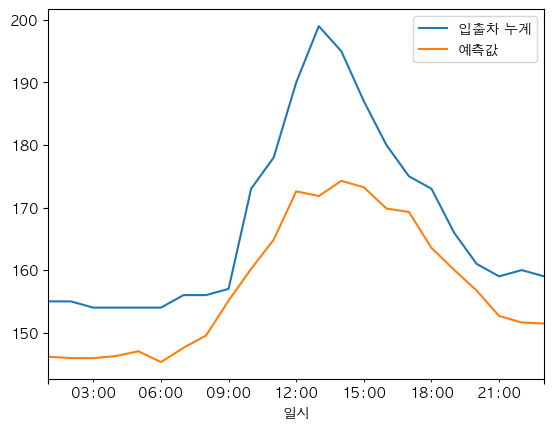

In [147]:
pd.concat([test_y, pd.Series(predict_test, index=test_y.index, name='예측값')], axis=1).plot()

In [148]:
pd.concat([test_y, pd.Series(predict_test, index=test_y.index, name='예측값')], axis=1)

,입출차 누계,예측값
일시,,
2022-10-01 01:00:00,155.0,146.145775
2022-10-01 02:00:00,155.0,145.942747
2022-10-01 03:00:00,154.0,145.924355
2022-10-01 04:00:00,154.0,146.258238
2022-10-01 05:00:00,154.0,147.027139
2022-10-01 06:00:00,154.0,145.284485
2022-10-01 07:00:00,156.0,147.575823
2022-10-01 08:00:00,156.0,149.542018
2022-10-01 09:00:00,157.0,155.118305


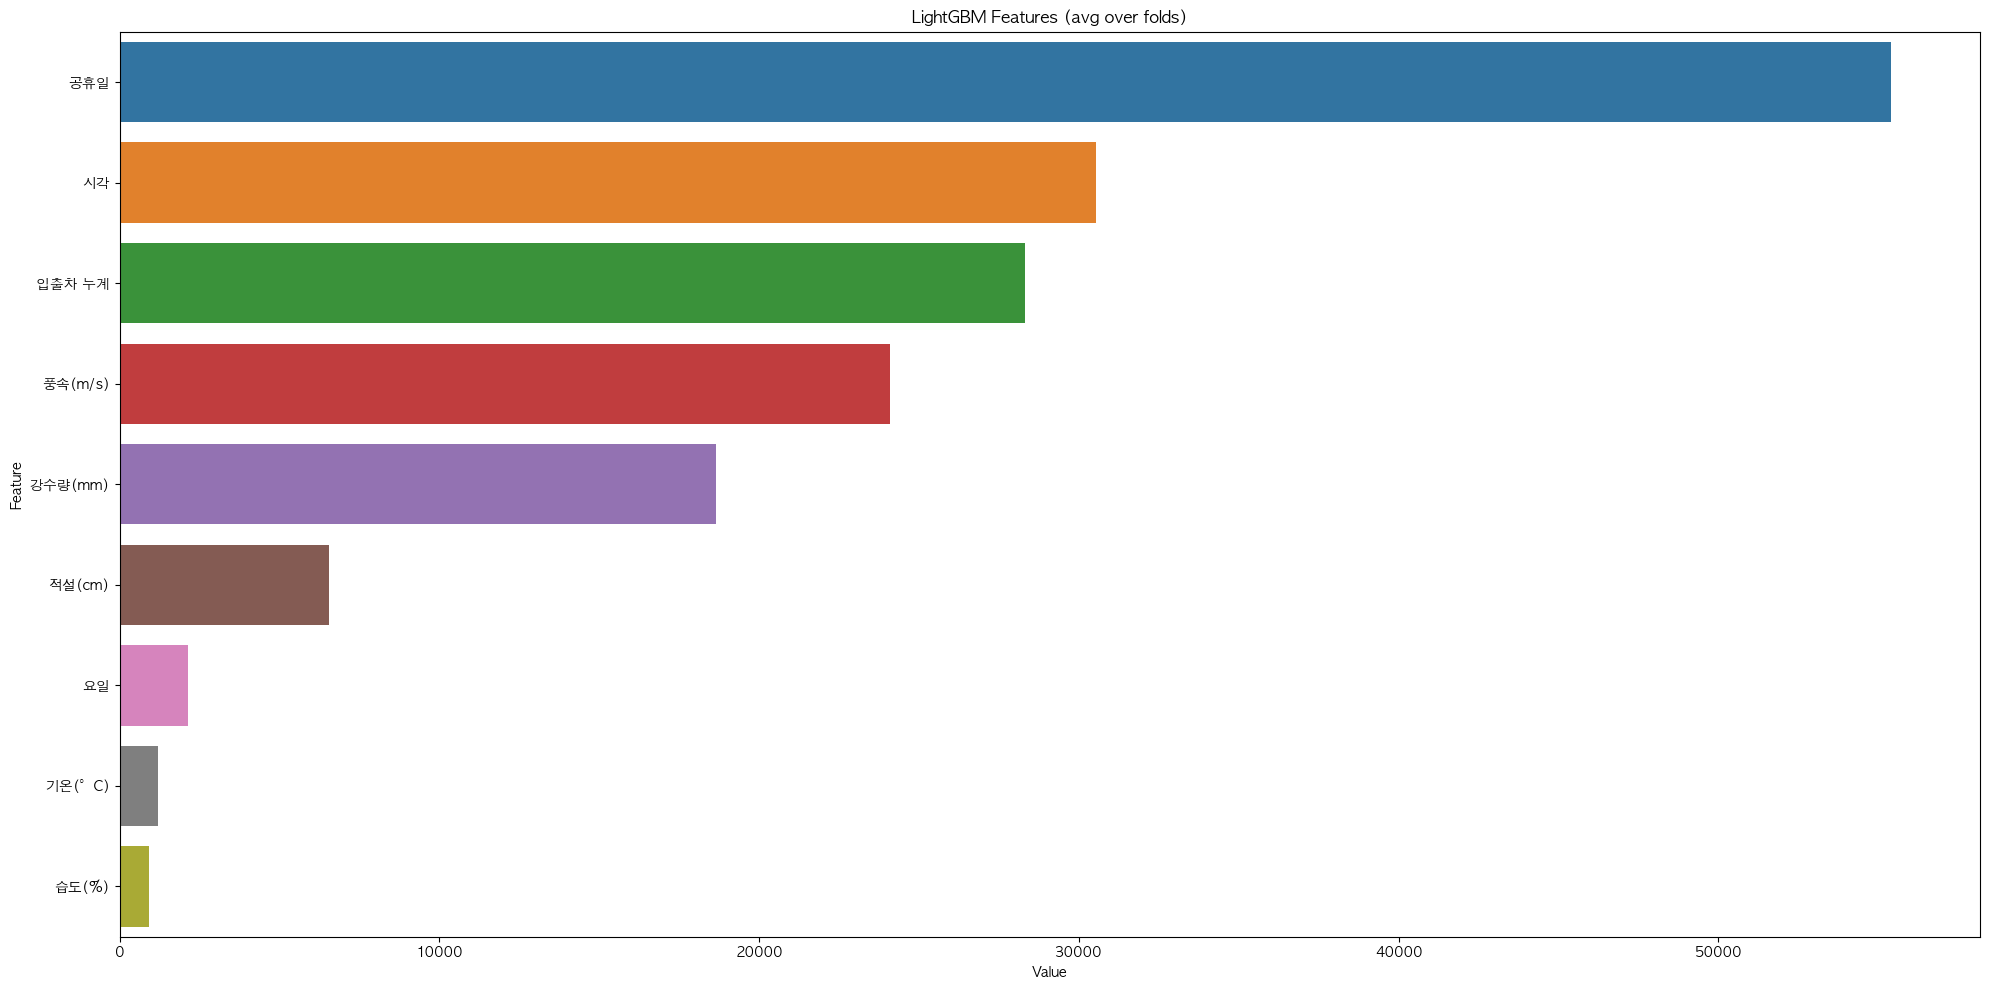

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,hanmaek_dataset.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()